## Backtesting Candlestick Patterns in Python - Hammer & Hanging Man

Reference: https://greyhoundanalytics.com/blog/backtesting-candlestick-patterns-in-python/

In [1]:
import vectorbt as vbt
from datetime import datetime, timedelta
import talib
from IPython import display
import plotly.graph_objects as go

In [2]:
end_time = datetime.now()
start_time = end_time - timedelta(days = 5)

In [3]:
data = vbt.YFData.download("BTC-USD", interval="1h", 
                           start=start_time,
                           end=end_time).get()
print(data)

                                   Open          High           Low  \
Datetime                                                              
2023-08-04 15:00:00+00:00  29241.628906  29273.587891  29214.685547   
2023-08-04 16:00:00+00:00  29249.826172  29262.707031  29228.564453   
2023-08-04 17:00:00+00:00  29243.710938  29250.710938  29183.087891   
2023-08-04 18:00:00+00:00  29182.060547  29182.060547  28967.123047   
2023-08-04 19:00:00+00:00  29035.908203  29069.613281  28983.630859   
...                                 ...           ...           ...   
2023-08-09 11:00:00+00:00  29825.589844  29879.931641  29790.199219   
2023-08-09 12:00:00+00:00  29872.369141  30043.496094  29849.333984   
2023-08-09 13:00:00+00:00  30057.324219  30093.435547  29863.802734   
2023-08-09 14:00:00+00:00  29866.269531  29922.292969  29765.621094   
2023-08-09 15:00:00+00:00  29760.111328  29766.201172  29676.394531   

                                  Close     Volume  Dividends  Stock Splits 

In [4]:
hammer = talib.CDLHAMMER(data.Open, data.High, data.Low, data.Close)
hammer[hammer == 100] # fiter out when hammer pattern occur

Datetime
2023-08-06 00:00:00+00:00    100
2023-08-06 10:00:00+00:00    100
2023-08-09 06:00:00+00:00    100
dtype: int32

In [5]:
hanging_man = talib.CDLHANGINGMAN(data.Open, data.High, 
                                  data.Low, data.Close)
hanging_man[hanging_man == -100] # filter out when hanging man pattern occur

Datetime
2023-08-09 08:00:00+00:00   -100
Freq: H, dtype: int32

In [6]:
buys = hammer == 100
sells = hanging_man == -100

pf = vbt.Portfolio.from_signals(data.Close, buys, sells, 
                                fees=0.005, init_cash=1000,
                                size_type="value")
pf.stats()

Start                         2023-08-04 15:00:00+00:00
End                           2023-08-09 15:00:00+00:00
Period                                  5 days 01:00:00
Start Value                                      1000.0
End Value                                   1016.808349
Total Return [%]                               1.680835
Benchmark Return [%]                           1.454731
Max Gross Exposure [%]                            100.0
Total Fees Paid                               10.084714
Max Drawdown [%]                               1.244117
Max Drawdown Duration                   1 days 23:00:00
Total Trades                                          1
Total Closed Trades                                   1
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                      100.0
Best Trade [%]                                 1.689239
Worst Trade [%]                                1

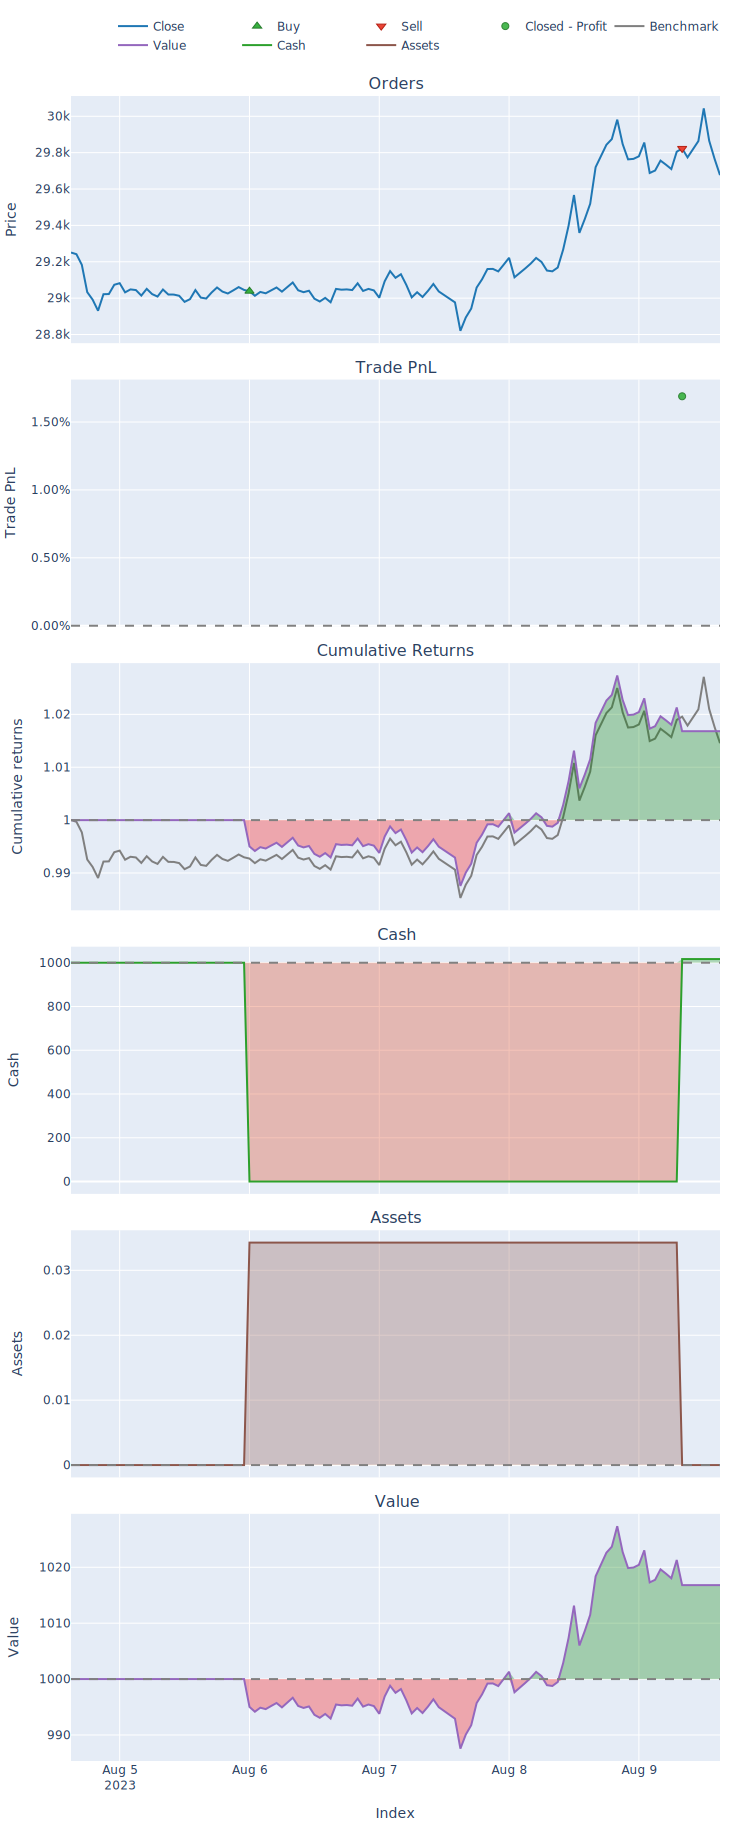

In [7]:
pf.plot(subplots=["orders","trade_pnl",
                  "cum_returns","cash",
                  "assets","value"]).show_svg()

In [8]:
trade_records = pf.trades.records_readable
trade_records

,Exit Trade Id,Column,Size,Entry Timestamp,Avg Entry Price,Entry Fees,Exit Timestamp,Avg Exit Price,Exit Fees,PnL,Return,Direction,Status,Position Id
0,0,0,0.034266,2023-08-06 00:00:00+00:00,29038.246094,4.975124,2023-08-09 08:00:00+00:00,29823.078125,5.10959,16.808349,0.016892,Long,Closed,0
